In [1]:
%matplotlib inline
from sklearn import mixture
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.mlab as mlab
from scipy.interpolate import *


In [2]:
data1 = np.loadtxt('LED_2.6V_Gain_25_grad_S13360_54V.txt').T
data2 = np.loadtxt('LED_2.6V_Gain_25_grad_S13360_55V.txt').T
data3 = np.loadtxt('LED_2.6V_Gain_25_grad_S13360_56V.txt').T
samples =500
time_0 =0
time=np.linspace(0,samples*8,samples)
pulses1 = -1000*data1[time_0:time_0+samples,:10000]
pulses2 = -1000*data2[time_0:time_0+samples,:10000]
pulses3 = -1000*data3[time_0:time_0+samples,:10000]
#pulses = -data
# Constants
t = 8e-9
gain = 92   ####### revisar estooooo####
res = 51
kte = t*1e-3/(gain*res)


In [3]:
# Baseline correction
N = len(pulses2.T)	# Number of pulses
mean1 = np.mean(pulses1[1,:])
mean2 = np.mean(pulses2[1,:])
mean3 = np.mean(pulses3[1,:])
pulses1 = pulses1 - mean1
pulses2 = pulses2 - mean2
pulses3 = pulses3- mean3
# Outliers filtering
mi1 = np.zeros(N)
mi2 = np.zeros(N)
mi3 = np.zeros(N)
pul = 0
outliers1 = []
outliers2 = []
outliers3 = []
for i in range (N):
	sum = 0
	mi1[i] = np.amin(pulses1[:,i])
	if mi1[i] > -11:
		pul = pul + 1
	else:
		outliers1.append(i) 
pul = 0
for i in range (N):
	sum = 0
	mi2[i] = np.amin(pulses2[:,i])
	if mi2[i] > -11:
		pul = pul + 1
	else:
		outliers2.append(i)   
pul = 0
for i in range (N):
	sum = 0
	mi3[i] = np.amin(pulses3[:,i])
	if mi3[i] > -11:
		pul = pul + 1
	else:
		outliers3.append(i) 
        
#print 'Number of pulses: ' + str(pul)
print 'Outliers: ' +str(len(outliers2))

Outliers: 2375


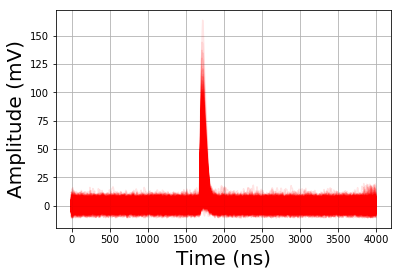

In [4]:
# señal filtrada 
pulses1=np.delete(pulses1,(outliers1),axis=1)
pulses2=np.delete(pulses2,(outliers2),axis=1)
pulses3=np.delete(pulses3,(outliers3),axis=1)
time=np.linspace(0,len(pulses1[:,1])*8,len(pulses1[:,1]))
plt.figure()
plt.plot(time,pulses1,'r',alpha=0.1)
plt.xlabel('Time (ns)', fontsize=20)
plt.ylabel('Amplitude (mV)', fontsize=20)
plt.grid(True)
#plt.ylim(-10,100)
#plt.gcf().set_size_inches(11,7)
#plt.savefig('2kPulses_Hamamatus.png')
plt.show()


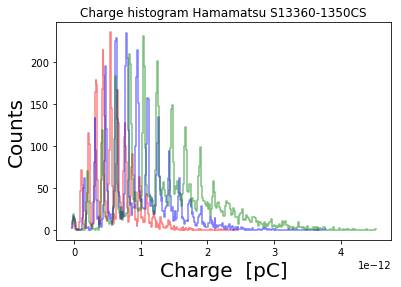

In [5]:
# Pulse and charge computing
N1 = len(pulses1.T)	# Number of pulses
N2 = len(pulses2.T)
N3 = len(pulses3.T)
charge1 = np.zeros((N1,1))
charge2 = np.zeros((N2,1))
charge3 = np.zeros((N3,1))
peak1 = np.zeros((N1,1))
peak2 = np.zeros((N2,1))
peak3= np.zeros((N3,1))
wind=25
start=209
pulsesf1=pulses1[start:start+wind,:]
pulsesf2=pulses2[start:start+wind,:]
pulsesf3=pulses3[start:start+wind,:]
for i in range (N1):
	charge1[i] = np.sum(pulsesf1[:,i])
	peak1[i] = np.max(pulsesf1[:,i])
for i in range (N2):
	charge2[i] = np.sum(pulsesf2[:,i])
	peak2[i] = np.max(pulsesf2[:,i])
for i in range (N3):
	charge3[i] = np.sum(pulsesf3[:,i])
	peak3[i] = np.max(pulsesf3[:,i])
# Charge histogram 
bins1, edges1 = np.histogram(charge1*kte,300)
bins2, edges2 = np.histogram(charge2*kte,330)
bins3, edges3 = np.histogram(charge3*kte,295)
left1, right1 = edges1[:-1], edges1[1:]
left2, right2 = edges2[:-1], edges2[1:]
left3, right3 = edges3[:-1], edges3[1:]
X1 = np.array([left1, right1]).T.flatten()
X2 = np.array([left2, right2]).T.flatten()
X3 = np.array([left3, right3]).T.flatten()
Y1 = np.array([bins1, bins1]).T.flatten()
Y2 = np.array([bins2, bins2]).T.flatten()
Y3 = np.array([bins3, bins3]).T.flatten()
plt.plot(X1, Y1,'r',alpha=0.5)
plt.plot(X2, Y2,'b',alpha=0.5)
plt.plot(X3, Y3,'g',alpha=0.5)
plt.title('Charge histogram Hamamatsu S13360-1350CS')
plt.xlabel("Charge  [pC]", fontsize=20)
plt.ylabel("Counts", fontsize=20)
#plt.ylim([0,250])
#plt.xlim([-100,2000])
#plt.gcf().set_size_inches(11,7)
plt.savefig('Charge histogram Hamamatsu S13360-1350CS.png')
plt.show()


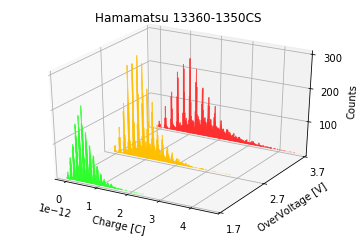

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
bins1, edges1 = np.histogram(charge1*kte,330)
bins2, edges2 = np.histogram(charge2*kte,250)
bins3, edges3 = np.histogram(charge3*kte,295)
xs1 = (edges1[:-1] + edges1[1:])/2
xs2 = (edges2[:-1] + edges2[1:])/2
xs3 = (edges3[:-1] + edges3[1:])/2
ax.bar(xs1, bins1,width=0.001e-12,zs=1.7, zdir='y', color='#2EFE2E', ec='#2EFE2E', alpha=0.8)
ax.bar(xs2, bins2,width=0.001e-12,zs=2.7, zdir='y', color='#FFBF00', ec='#FFBF00', alpha=0.8)
ax.bar(xs3, bins3,width=0.001e-12,zs=3.7, zdir='y', color='#FE2E2E', ec='#FE2E2E', alpha=0.8)

ax.set_xlabel('Charge [C]')
ax.set_ylabel('OverVoltage [V]')
ax.set_zlabel('Counts')
#ax.set_xlim(-100,4000)
ax.set_ylim(1.7,3.7)
ax.set_zticks([ 100, 200,300])
ax.set_yticks([1.7, 2.7, 3.7])
ax.set_title('Hamamatsu 13360-1350CS')
#ax.set_xticks([0, 1e-12,2e-12,3e-12])
#ax.set_zlim()
plt.savefig('G_ov_1350CS.eps')
plt.show()